In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rf_data = pd.read_csv('model_performance/rf_gridsearch_cv.csv')
rf_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018581,0.006779,0.003323,0.001835,5.0,5,"{'max_depth': 5, 'n_estimators': 5}",0.945055,0.912088,0.967033,0.945055,0.956044,0.945055,0.018388,5
1,0.020118,0.000065,0.002938,0.003880,5.0,10,"{'max_depth': 5, 'n_estimators': 10}",0.890110,0.890110,0.956044,0.945055,0.956044,0.927473,0.030769,25
2,0.038479,0.005972,0.002549,0.002261,5.0,20,"{'max_depth': 5, 'n_estimators': 20}",0.923077,0.901099,0.945055,0.934066,0.956044,0.931868,0.018906,24
3,0.084761,0.003390,0.003233,0.002974,5.0,50,"{'max_depth': 5, 'n_estimators': 50}",0.912088,0.934066,0.956044,0.945055,0.967033,0.942857,0.018906,10
4,0.170990,0.001917,0.007742,0.001791,5.0,100,"{'max_depth': 5, 'n_estimators': 100}",0.912088,0.934066,0.956044,0.934066,0.967033,0.940659,0.019160,11


In [3]:
rf_data['param_max_depth'] = rf_data['param_max_depth'].fillna('None')
rf_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018581,0.006779,0.003323,0.001835,5.0,5,"{'max_depth': 5, 'n_estimators': 5}",0.945055,0.912088,0.967033,0.945055,0.956044,0.945055,0.018388,5
1,0.020118,0.000065,0.002938,0.003880,5.0,10,"{'max_depth': 5, 'n_estimators': 10}",0.890110,0.890110,0.956044,0.945055,0.956044,0.927473,0.030769,25
2,0.038479,0.005972,0.002549,0.002261,5.0,20,"{'max_depth': 5, 'n_estimators': 20}",0.923077,0.901099,0.945055,0.934066,0.956044,0.931868,0.018906,24
3,0.084761,0.003390,0.003233,0.002974,5.0,50,"{'max_depth': 5, 'n_estimators': 50}",0.912088,0.934066,0.956044,0.945055,0.967033,0.942857,0.018906,10
4,0.170990,0.001917,0.007742,0.001791,5.0,100,"{'max_depth': 5, 'n_estimators': 100}",0.912088,0.934066,0.956044,0.934066,0.967033,0.940659,0.019160,11


In [4]:
top_score_row = rf_data[rf_data['mean_test_score'] == rf_data['mean_test_score'].max()][['param_n_estimators', 'mean_fit_time', 'mean_test_score', 'param_max_depth']].values.tolist()
top_rf_n_estimators = top_score_row[0][0]
top_rf_mean_fit_time = top_score_row[0][1]
top_rf_mean_fit_time = float("%.5f" % top_rf_mean_fit_time)
top_rf_mean_test_score = top_score_row[0][2]
top_rf_mean_test_score = float("%.5f" % top_rf_mean_test_score)
top_rf_depth = top_score_row[0][3]
top_rf_n_estimators, top_rf_mean_fit_time, top_rf_mean_test_score, top_rf_depth

(5, 0.0103, 0.95165, 10.0)

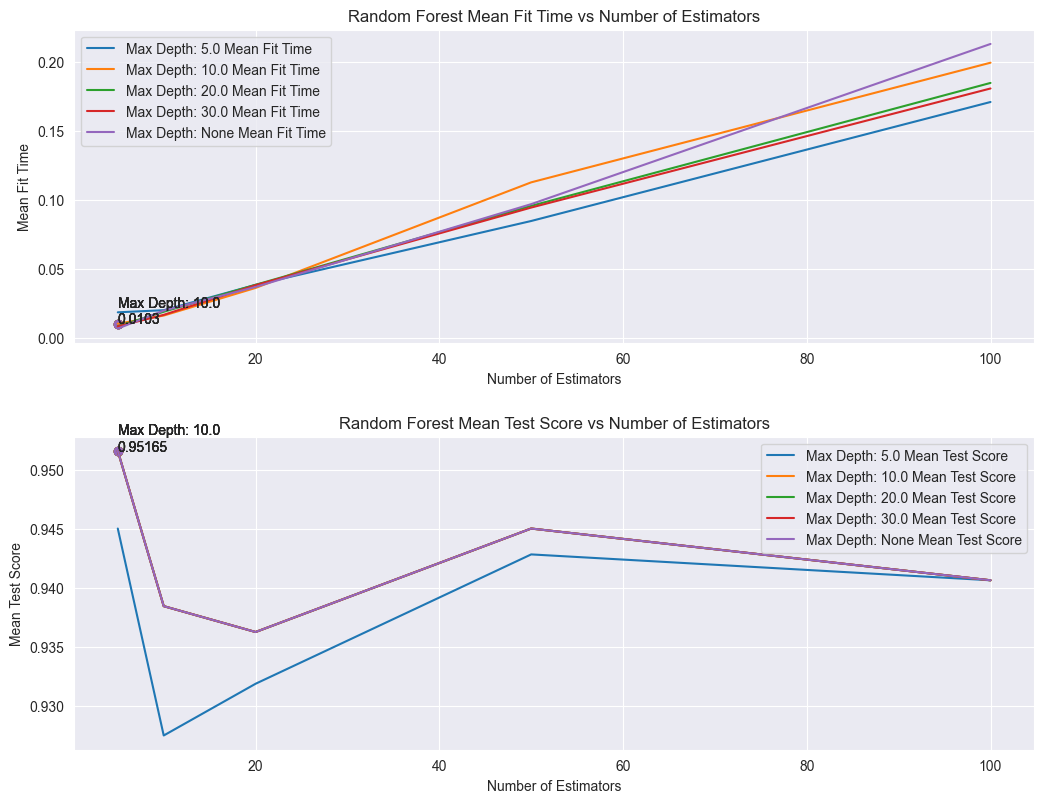

In [5]:
plt.figure(figsize=(12, 9))
depths = rf_data['param_max_depth'].fillna('None').unique()

for depth in depths:
    plt.subplot(2, 1, 1)
    plt.plot(rf_data[rf_data['param_max_depth']==depth]['param_n_estimators'],
            rf_data[rf_data['param_max_depth']==depth]['mean_fit_time'], label=f'Max Depth: {depth} Mean Fit Time')
    plt.title('Random Forest Mean Fit Time vs Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_rf_n_estimators, top_rf_mean_fit_time)
    plt.annotate(f'Max Depth: {top_rf_depth}\n{top_rf_mean_fit_time}',
                 xy=(top_rf_n_estimators, top_rf_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(rf_data[rf_data['param_max_depth']==depth]['param_n_estimators'],
             rf_data[rf_data['param_max_depth']==depth]['mean_test_score'], label=f'Max Depth: {depth} Mean Test Score')
    plt.title('Random Forest Mean Test Score vs Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_rf_n_estimators, top_rf_mean_test_score)
    plt.annotate(f'Max Depth: {top_rf_depth}\n{top_rf_mean_test_score}',
                 xy=(top_rf_n_estimators, top_rf_mean_test_score))
    plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/rf_performance.png')

In [6]:
lr_data = pd.read_csv('model_performance/lr_gridsearch_cv.csv')
lr_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022301,0.009003,0.006341,0.003654,0.0001,NaN,"{'C': 0.0001, 'penalty': None}",0.945055,0.912088,0.989011,0.956044,0.967033,0.953846,0.025441,3
1,0.003191,0.003646,0.002497,0.002304,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,13
2,0.016991,0.007662,0.003291,0.003120,0.0010,NaN,"{'C': 0.001, 'penalty': None}",0.945055,0.912088,0.989011,0.956044,0.967033,0.953846,0.025441,3
3,0.007332,0.002038,0.000099,0.000199,0.0010,l2,"{'C': 0.001, 'penalty': 'l2'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,13
4,0.017893,0.005722,0.001029,0.002059,0.0100,NaN,"{'C': 0.01, 'penalty': None}",0.945055,0.912088,0.989011,0.956044,0.967033,0.953846,0.025441,3


In [7]:
lr_data['param_penalty'] = lr_data['param_penalty'].fillna('None')
lr_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022301,0.009003,0.006341,0.003654,0.0001,None,"{'C': 0.0001, 'penalty': None}",0.945055,0.912088,0.989011,0.956044,0.967033,0.953846,0.025441,3
1,0.003191,0.003646,0.002497,0.002304,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,13
2,0.016991,0.007662,0.003291,0.003120,0.0010,None,"{'C': 0.001, 'penalty': None}",0.945055,0.912088,0.989011,0.956044,0.967033,0.953846,0.025441,3
3,0.007332,0.002038,0.000099,0.000199,0.0010,l2,"{'C': 0.001, 'penalty': 'l2'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,13
4,0.017893,0.005722,0.001029,0.002059,0.0100,None,"{'C': 0.01, 'penalty': None}",0.945055,0.912088,0.989011,0.956044,0.967033,0.953846,0.025441,3
5,0.002010,0.002883,0.003016,0.003955,0.0100,l2,"{'C': 0.01, 'penalty': 'l2'}",0.714286,0.791209,0.747253,0.714286,0.725275,0.738462,0.028991,12
6,0.018760,0.011887,0.003335,0.003861,0.1000,None,"{'C': 0.1, 'penalty': None}",0.945055,0.912088,0.989011,0.956044,0.967033,0.953846,0.025441,3
7,0.004801,0.002988,0.001798,0.003596,0.1000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.934066,0.923077,0.945055,0.901099,0.923077,0.925275,0.014579,11
8,0.018172,0.003043,0.001506,0.002127,1.0000,None,"{'C': 1, 'penalty': None}",0.945055,0.912088,0.989011,0.956044,0.967033,0.953846,0.025441,3
9,0.010112,0.001333,0.000000,0.000000,1.0000,l2,"{'C': 1, 'penalty': 'l2'}",0.956044,0.912088,0.978022,0.945055,0.978022,0.953846,0.024474,3


In [8]:
top_lr_score_row = lr_data[lr_data['mean_test_score'] == lr_data['mean_test_score'].max()][['param_C', 'mean_fit_time', 'mean_test_score', 'param_penalty']].values.tolist()
top_lr_c = top_lr_score_row[0][0]
top_lr_mean_fit_time = top_lr_score_row[0][1]
top_lr_mean_fit_time = float("%.5f" % top_lr_mean_fit_time)
top_lr_mean_test_score = top_lr_score_row[0][2]
top_lr_mean_test_score = float("%.5f" % top_lr_mean_test_score)
top_lr_penalty = top_lr_score_row[0][3]
top_lr_c, top_lr_mean_fit_time, top_lr_mean_test_score, top_lr_penalty

(10.0, 0.01336, 0.97143, 'l2')

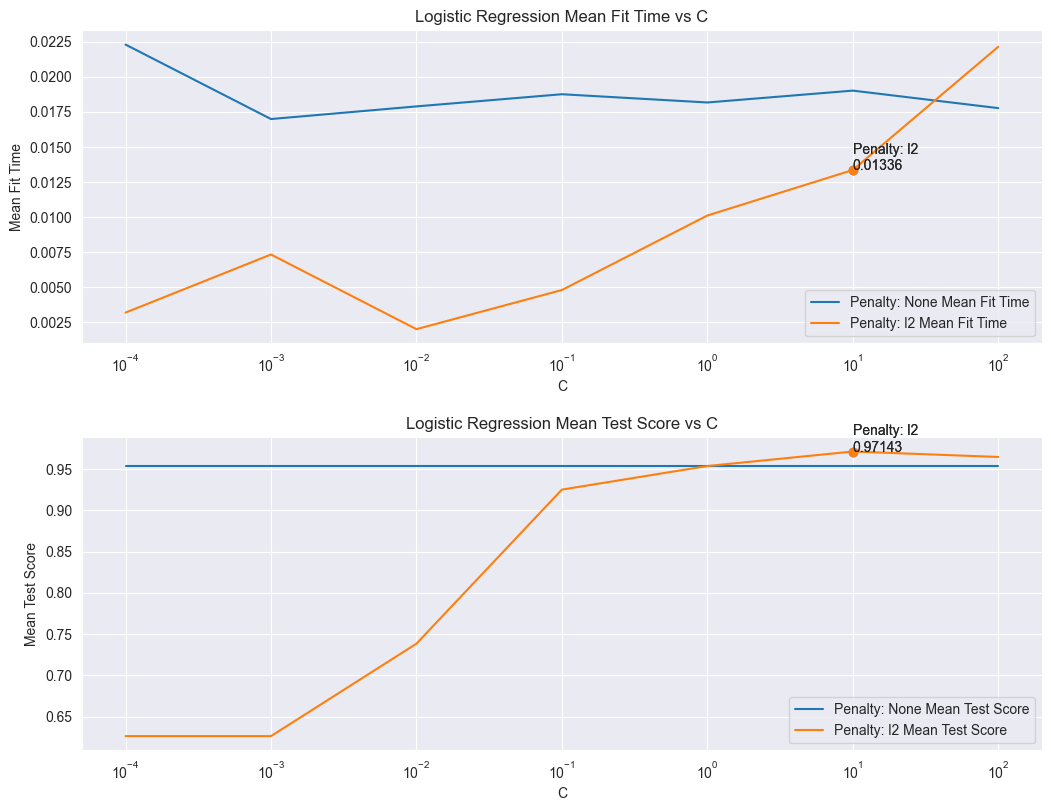

In [9]:
plt.figure(figsize=(12, 9))
penalties = lr_data['param_penalty'].unique()

for penalty in penalties:
    plt.subplot(2, 1, 1)
    plt.xscale('log')
    plt.plot(lr_data[lr_data['param_penalty']==penalty]['param_C'],
            lr_data[lr_data['param_penalty']==penalty]['mean_fit_time'], label=f'Penalty: {penalty} Mean Fit Time')
    plt.title('Logistic Regression Mean Fit Time vs C')
    plt.xlabel('C')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_lr_c, top_lr_mean_fit_time)
    plt.annotate(f'Penalty: {top_lr_penalty}\n{top_lr_mean_fit_time}', xy=(top_lr_c, top_lr_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xscale('log')
    plt.plot(lr_data[lr_data['param_penalty']==penalty]['param_C'],
             lr_data[lr_data['param_penalty']==penalty]['mean_test_score'], label=f'Penalty: {penalty} Mean Test Score')
    plt.title('Logistic Regression Mean Test Score vs C')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_lr_c, top_lr_mean_test_score)
    plt.annotate(f'Penalty: {top_lr_penalty}\n{top_lr_mean_test_score}', xy=(top_lr_c, top_lr_mean_test_score))
    plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/lr_performance.png')

In [10]:
svm_data = pd.read_csv('model_performance/svm_gridsearch_cv.csv')
svm_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005256,0.005151,0.000801,0.001602,0.1,2,linear,"{'C': 0.1, 'degree': 2, 'kernel': 'linear'}",0.956044,0.912088,0.956044,0.945055,0.967033,0.947253,0.018906,37
1,0.005774,0.005820,0.002259,0.002798,0.1,2,poly,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.956044,0.934066,0.978022,0.945055,0.989011,0.960440,0.020382,28
2,0.004560,0.005353,0.007371,0.001696,0.1,2,rbf,"{'C': 0.1, 'degree': 2, 'kernel': 'rbf'}",0.956044,0.912088,0.978022,0.934066,0.967033,0.949451,0.023671,32
3,0.003370,0.003622,0.008625,0.002412,0.1,2,sigmoid,"{'C': 0.1, 'degree': 2, 'kernel': 'sigmoid'}",0.582418,0.571429,0.582418,0.571429,0.505495,0.562637,0.028991,46
4,0.003953,0.003759,0.000000,0.000000,0.1,3,linear,"{'C': 0.1, 'degree': 3, 'kernel': 'linear'}",0.956044,0.912088,0.956044,0.945055,0.967033,0.947253,0.018906,37


In [11]:
top_svm_score_row = svm_data[svm_data['mean_test_score'] == svm_data['mean_test_score'].max()][['param_C', 'mean_fit_time', 'mean_test_score', 'param_kernel', 'param_degree']].values.tolist()
top_svm_c = top_svm_score_row[0][0]
top_svm_mean_fit_time = top_svm_score_row[0][1]
top_svm_mean_fit_time = float("%.5f" % top_svm_mean_fit_time)
top_svm_mean_test_score = top_svm_score_row[0][2]
top_svm_mean_test_score = float("%.5f" % top_svm_mean_test_score)
top_svm_kernel = top_svm_score_row[0][3]
top_svm_degree = top_svm_score_row[0][4]
top_svm_c, top_svm_mean_fit_time, top_svm_mean_test_score, top_svm_kernel, top_svm_degree

(10.0, 0.00394, 0.98022, 'linear', 2)

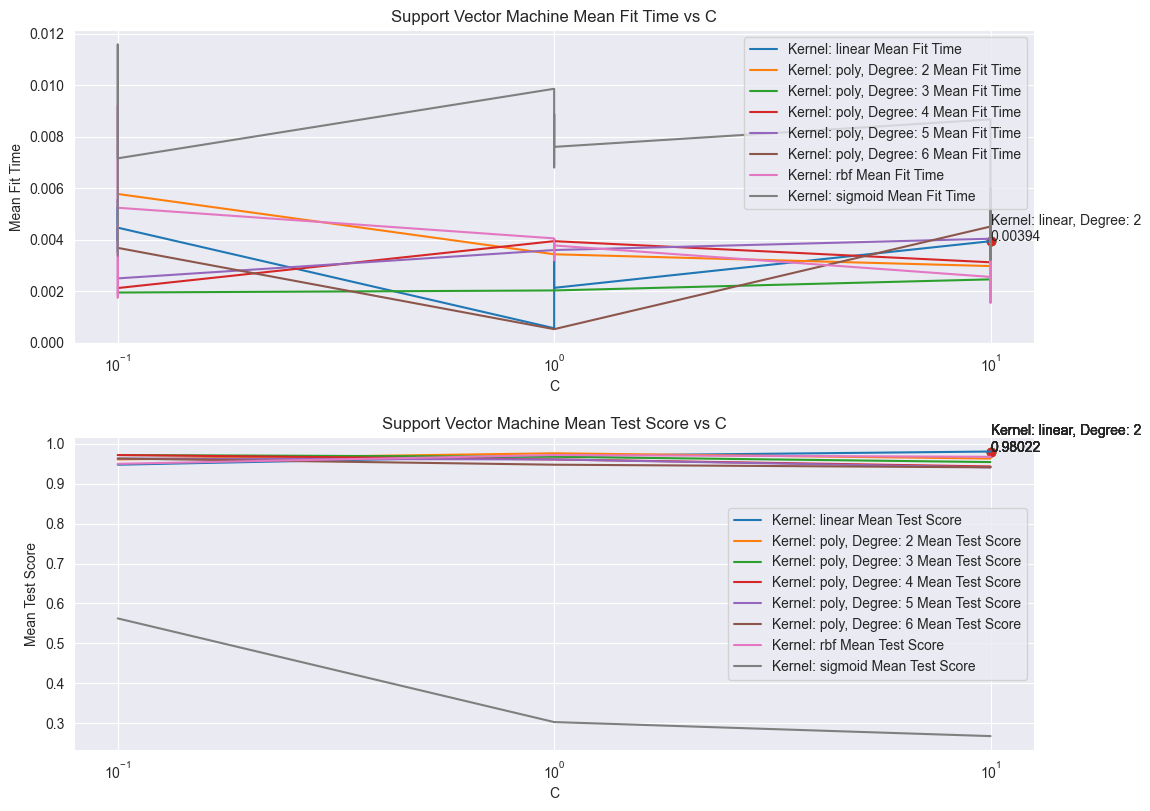

In [12]:
plt.figure(figsize=(12, 9))
kernels = svm_data['param_kernel'].unique()
degrees = svm_data['param_degree'].unique()
for kernel in kernels:
    plt.subplot(2, 1, 1)
    plt.xscale('log')
    if kernel == 'poly':
        for degree in degrees:
            plt.plot(svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['param_C'],
                     svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['mean_fit_time'],
                     label=f'Kernel: {kernel}, Degree: {degree} Mean Fit Time')
            plt.title('Support Vector Machine Mean Fit Time vs C')
            plt.xlabel('C')
            plt.ylabel('Mean Fit Time')
        plt.annotate(f'Kernel: {top_svm_kernel}, Degree: {top_svm_degree}\n{top_svm_mean_fit_time}',
                     xy=(top_svm_c, top_svm_mean_fit_time))
    else:
        plt.plot(svm_data[svm_data['param_kernel']==kernel]['param_C'],
                 svm_data[svm_data['param_kernel']==kernel]['mean_fit_time'],
                 label=f'Kernel: {kernel} Mean Fit Time')
        plt.title('Support Vector Machine Mean Fit Time vs C')
        plt.xlabel('C')
        plt.ylabel('Mean Fit Time')
        plt.annotate(f'Kernel: {top_svm_kernel}\n{top_svm_mean_test_score}', xy=(top_svm_c, top_svm_mean_test_score))
    plt.scatter(top_svm_c, top_svm_mean_fit_time)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xscale('log')
    if kernel == 'poly':
        for degree in degrees:
            plt.plot(svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['param_C'],
                     svm_data[(svm_data['param_kernel']==kernel) & (svm_data['param_degree']==degree)]['mean_test_score'],
                     label=f'Kernel: {kernel}, Degree: {degree} Mean Test Score')
            plt.title('Support Vector Machine Mean Fit Time vs C')
            plt.xlabel('C')
            plt.ylabel('Mean Test Score')
            plt.annotate(f'Kernel: {top_svm_kernel}, Degree: {top_svm_degree}\n{top_svm_mean_test_score}',
                         xy=(top_svm_c, top_svm_mean_test_score))
    else:
        plt.plot(svm_data[svm_data['param_kernel']==kernel]['param_C'],
                 svm_data[svm_data['param_kernel']==kernel]['mean_test_score'],
                 label=f'Kernel: {kernel} Mean Test Score')
        plt.title('Support Vector Machine Mean Test Score vs C')
        plt.xlabel('C')
        plt.ylabel('Mean Test Score')
        plt.annotate(f'Kernel: {top_svm_kernel}\n{top_svm_mean_test_score}', xy=(top_svm_c, top_svm_mean_test_score))
    plt.scatter(top_svm_c, top_svm_mean_test_score)
    plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/svm_performance.png')

In [13]:
knn_data = pd.read_csv('model_performance/knn_gridsearch_cv.csv')
knn_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.059823,0.109306,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.967033,0.945055,0.967033,0.945055,0.978022,0.960440,0.013187,26
1,0.001830,0.003660,0.003596,0.004448,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.978022,0.923077,0.956044,0.967033,0.978022,0.960440,0.020382,26
2,0.000354,0.000709,0.004159,0.005127,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.989011,0.923077,0.956044,0.967033,0.989011,0.964835,0.024474,17
3,0.001599,0.003198,0.003198,0.003916,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.989011,0.923077,0.956044,0.967033,0.989011,0.964835,0.024474,17
4,0.000096,0.000192,0.003312,0.003362,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.978022,0.923077,0.978022,0.967033,0.989011,0.967033,0.023051,13


In [14]:
top_knn_score_row = knn_data[knn_data['mean_test_score'] == knn_data['mean_test_score'].max()][['param_n_neighbors', 'mean_fit_time', 'mean_test_score', 'param_weights']].values.tolist()
top_knn_n_neighbors = top_knn_score_row[0][0]
top_knn_mean_fit_time = top_knn_score_row[0][1]
top_knn_mean_fit_time = float("%.5f" % top_knn_mean_fit_time)
top_knn_mean_test_score = top_knn_score_row[0][2]
top_knn_mean_test_score = float("%.5f" % top_knn_mean_test_score)
top_knn_weight = top_knn_score_row[0][3]
top_knn_n_neighbors, top_knn_mean_fit_time, top_knn_mean_test_score, top_knn_weight

(6, 0.0, 0.97143, 'uniform')

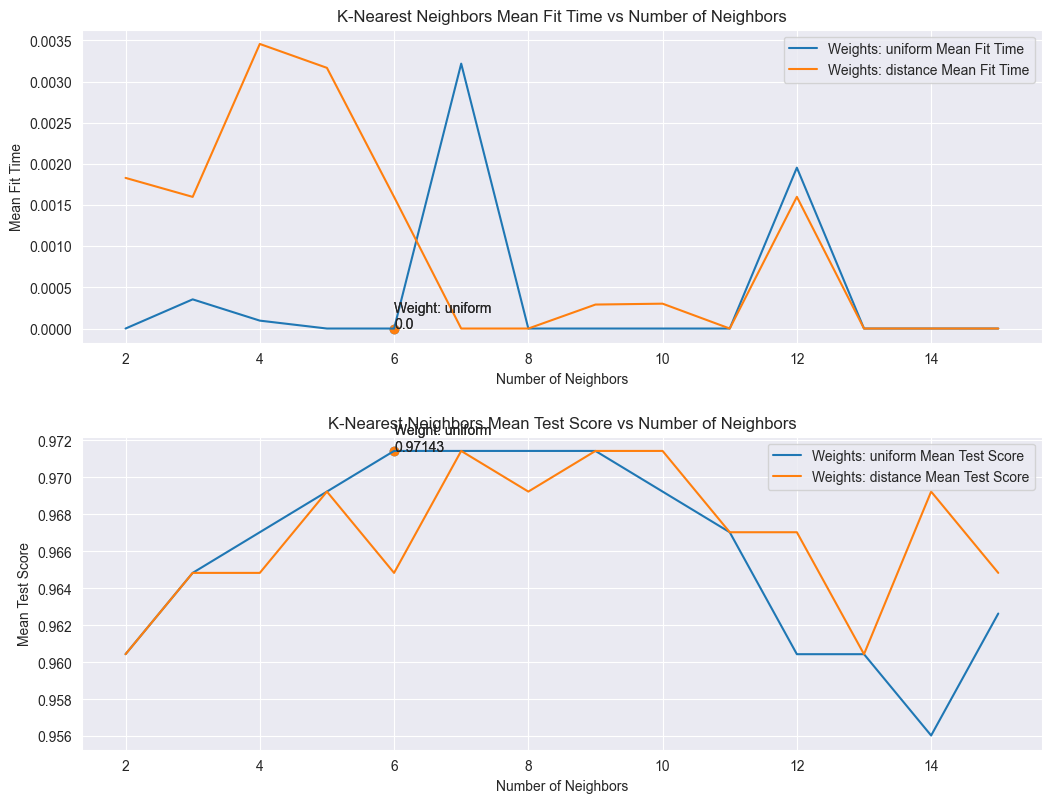

In [15]:
plt.figure(figsize=(12, 9))
weights = knn_data['param_weights'].unique()

for weight in weights:
    plt.subplot(2, 1, 1)
    plt.plot(knn_data[knn_data['param_weights']==weight]['param_n_neighbors'],
            knn_data[knn_data['param_weights']==weight]['mean_fit_time'], label=f'Weights: {weight} Mean Fit Time')
    plt.title('K-Nearest Neighbors Mean Fit Time vs Number of Neighbors')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Fit Time')
    plt.scatter(top_knn_n_neighbors, top_knn_mean_fit_time)
    plt.annotate(f'Weight: {top_knn_weight}\n{top_knn_mean_fit_time}', xy=(top_knn_n_neighbors, top_knn_mean_fit_time))
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(knn_data[knn_data['param_weights']==weight]['param_n_neighbors'],
             knn_data[knn_data['param_weights']==weight]['mean_test_score'], label=f'Weights: {weight} Mean Test Score')
    plt.title('K-Nearest Neighbors Mean Test Score vs Number of Neighbors')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Mean Test Score')
    plt.scatter(top_knn_n_neighbors, top_knn_mean_test_score)
    plt.annotate(f'Weight: {top_knn_weight}\n{top_knn_mean_test_score}', xy=(top_knn_n_neighbors, top_knn_mean_test_score))
    plt.legend()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/knn_performance.png')

In [16]:
mlp_data = pd.read_csv('model_performance/mlp_gridsearch_cv.csv')
mlp_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034094,0.018538,0.001941,0.003882,identity,10,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.956044,0.912088,1.000000,0.945055,0.945055,0.951648,0.028317,13
1,0.069548,0.005790,0.001475,0.002062,identity,10,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.912088,0.901099,0.945055,0.835165,0.835165,0.885714,0.043736,40
2,0.076882,0.002298,0.000000,0.000000,identity,10,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.868132,0.934066,0.967033,0.934066,0.912088,0.923077,0.032599,29
3,0.029100,0.010266,0.000000,0.000000,identity,20,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.945055,0.912088,0.978022,0.956044,0.956044,0.949451,0.021534,15
4,0.072885,0.006586,0.000000,0.000000,identity,20,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.890110,0.901099,0.934066,0.868132,0.912088,0.901099,0.021978,37


In [17]:
top_mlp_score_row = mlp_data[mlp_data['mean_test_score'] == mlp_data['mean_test_score'].max()][['param_hidden_layer_sizes', 'mean_fit_time', 'mean_test_score', 'param_activation', 'param_solver']].values.tolist()
top_mlp_layer_size = top_mlp_score_row[0][0]
top_mlp_mean_fit_time = top_mlp_score_row[0][1]
top_mlp_mean_fit_time = float("%.5f" % top_mlp_mean_fit_time)
top_mlp_mean_test_score = top_mlp_score_row[0][2]
top_mlp_mean_test_score = float("%.5f" % top_mlp_mean_test_score)
top_mlp_activation = top_mlp_score_row[0][3]
top_mlp_solver = top_mlp_score_row[0][4]
top_mlp_layer_size, top_mlp_mean_fit_time, top_mlp_mean_test_score, top_mlp_activation, top_mlp_solver

(100, 0.20577, 0.96264, 'relu', 'lbfgs')

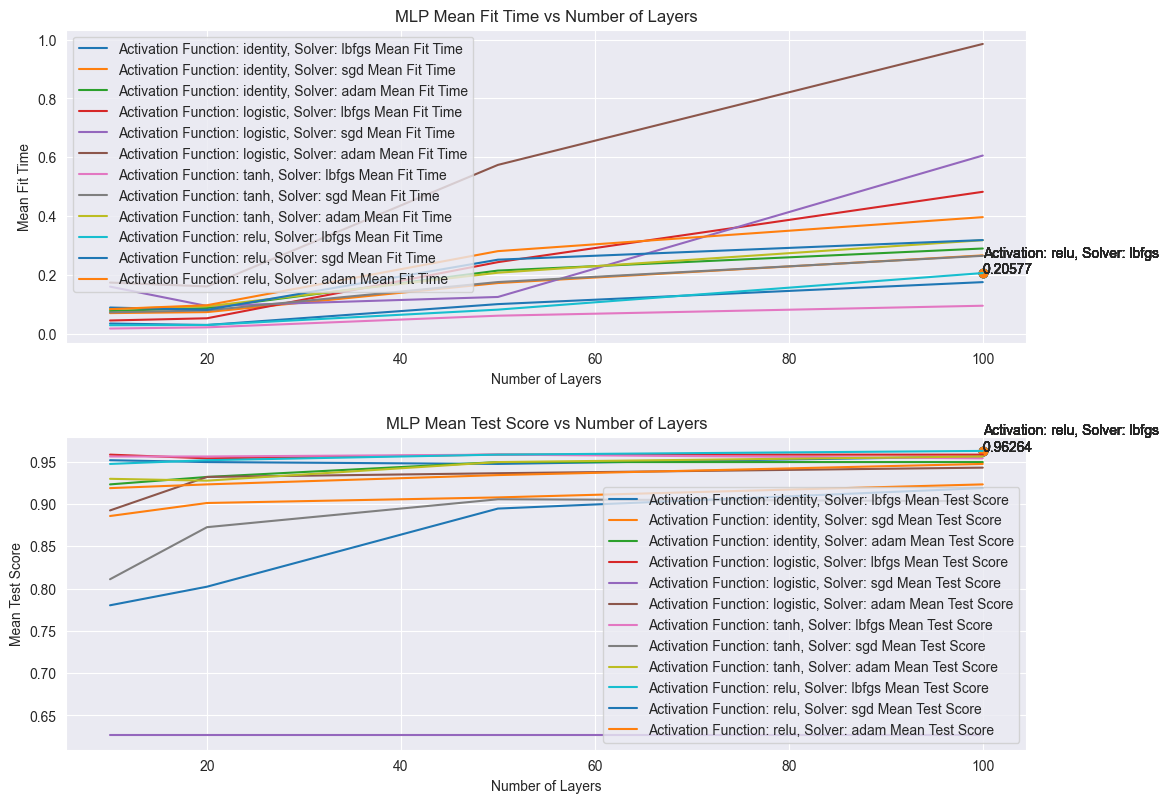

In [18]:
plt.figure(figsize=(12, 9))
activation_functions = mlp_data['param_activation'].unique()
solvers = mlp_data['param_solver'].unique()

for activation in activation_functions:
    for solver in solvers:
        plt.subplot(2, 1, 1)
        plt.plot(mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['param_hidden_layer_sizes'],
                 mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['mean_fit_time'],
                 label=f'Activation Function: {activation}, Solver: {solver} Mean Fit Time')
        plt.title('MLP Mean Fit Time vs Number of Layers')
        plt.xlabel('Number of Layers')
        plt.ylabel('Mean Fit Time')
        plt.scatter(top_mlp_layer_size, top_mlp_mean_fit_time)
        plt.annotate(f'Activation: {top_mlp_activation}, Solver: {top_mlp_solver}\n{top_mlp_mean_fit_time}',
                     xy=(top_mlp_layer_size, top_mlp_mean_fit_time))
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['param_hidden_layer_sizes'],
                 mlp_data[(mlp_data['param_activation']==activation) &
                          (mlp_data['param_solver']==solver)]['mean_test_score'],
                 label=f'Activation Function: {activation}, Solver: {solver} Mean Test Score')
        plt.title('MLP Mean Test Score vs Number of Layers')
        plt.xlabel('Number of Layers')
        plt.ylabel('Mean Test Score')
        plt.scatter(top_mlp_layer_size, top_mlp_mean_test_score)
        plt.annotate(f'Activation: {top_mlp_activation}, Solver: {top_mlp_solver}\n{top_mlp_mean_test_score}',
                     xy=(top_mlp_layer_size, top_mlp_mean_test_score))
        plt.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.3)
# plt.show()
plt.savefig('visuals/model_performance/mlp_performance.png')